## Explaining Cartopy 
Cartopy is a Python library that deals with processing geospatial data and visualizing that data. It is especially useful for dealing with and visualzing meteorological data. 

### Importing Cartopy and other packages

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

### Plotting Basic Map
Here we will show the creation of a figure using cartopy and show how it can be used for showing temperature anomalies on a map. 

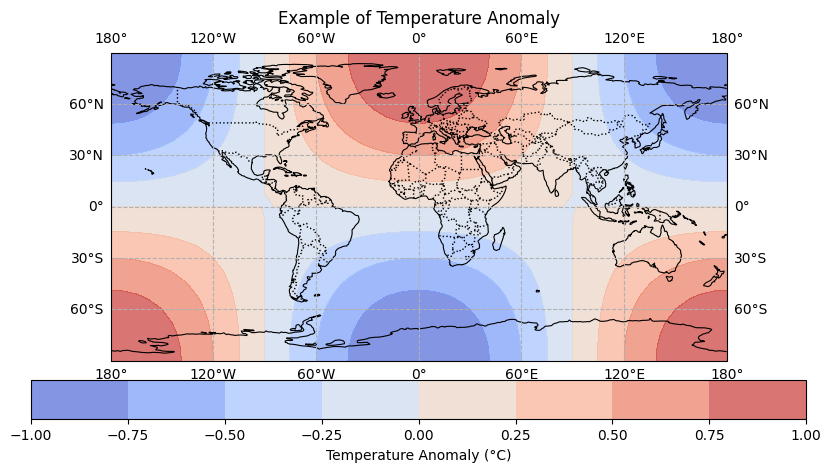

In [13]:
# Create figure with projection
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_global()

# Adding various geographical features 
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True, linestyle='--')

# Example: Plot a simple temperature anomaly field over the globe
lon = np.linspace(-180, 180, 50)
lat = np.linspace(-90, 90, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.sin(np.radians(lat2d)) * np.cos(np.radians(lon2d))  # Fake temperature anomaly field

# Plot contourf with a colorbar to show temperature anomalies 
contour = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree(), cmap='coolwarm', alpha=0.7)
cbar = plt.colorbar(contour, ax=ax, orientation='horizontal', pad=0.05)
cbar.set_label('Temperature Anomaly (°C)')

ax.set_title("Example of Temperature Anomaly")
plt.show()



### Another Example Wind Barbs: 
Here is another example using cartopy and plotting wind barbs. 

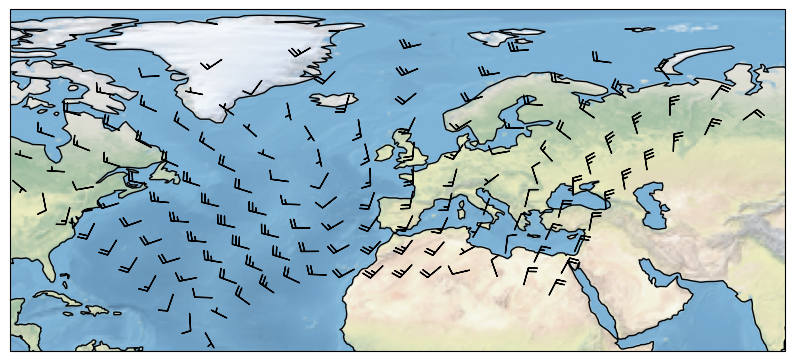

In [14]:
def sample_data(shape=(20, 30)):
    crs = ccrs.RotatedPole(pole_longitude=177.5, pole_latitude=37.5)

    x = np.linspace(311.9, 391.1, shape[1])
    y = np.linspace(-23.6, 24.8, shape[0])

    x2d, y2d = np.meshgrid(x, y)
    u = 10 * (2 * np.cos(2 * np.deg2rad(x2d) + 3 * np.deg2rad(y2d + 30)) ** 2)
    v = 20 * np.cos(6 * np.deg2rad(x2d))

    return x, y, u, v, crs
def main():
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
    ax.set_extent([-90, 80, 10, 85], crs=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()

    x, y, u, v, vector_crs = sample_data(shape=(10, 14))
    ax.barbs(x, y, u, v, length=5,
             sizes=dict(emptybarb=0.25, spacing=0.2, height=0.5),
             linewidth=0.95, transform=vector_crs)

    plt.show()
if __name__ == '__main__':
    main()

### Conclusion 
Cartopy is a powerful tool for dealing with geospatial data visualization. This can be very useful for displaying meteorological data and data for other geosciences. 